## Assignment 1
Author: Valter Miari

In [329]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import pandas as pd
import numpy as np
from scipy.stats import norm
from collections import Counter
from pprint import pprint

/var/folders/st/ztz092hj7sdcnz4hsgfxjgqh0000gn/T/ipykernel_80148/2092611114.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


#### Part 1: Real estate prices

In [330]:
# Reading the data and computing some descriptive statistics about the data
real_estate_prices = pd.read_csv("./houses.csv")
rep_values = real_estate_prices.iloc[:,1]
rep_mean = rep_values.mean()
rep_median = rep_values.median()
rep_std = rep_values.std()
rep_min = rep_values.min()
rep_max = rep_values.max()

rep_values.to_numpy() # Converting from Series to ndarray
print(f'Median: {rep_mean}\nMedian: {rep_median}\nStandard deviation: {rep_std}\nMinimum value: {rep_min}\nMaximum value: {rep_max}')

Median: 174387.9776197762
Median: 129000.0
Standard deviation: 351464.9420183792
Minimum value: 150
Maximum value: 48465717


Text(0.5, 1.0, 'Prices of real estates in England')

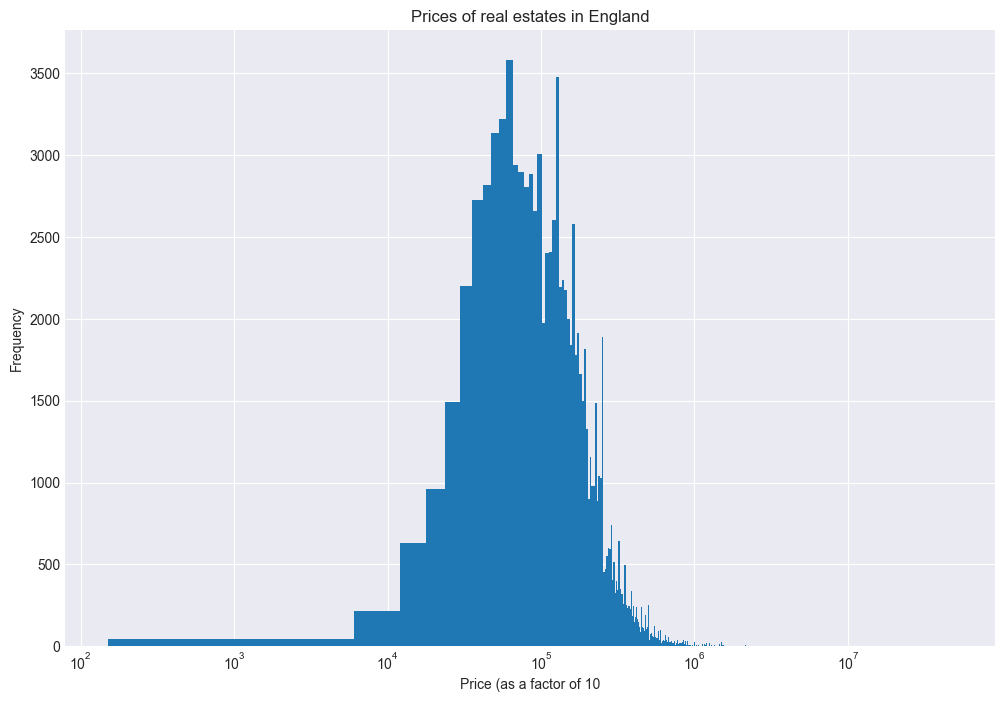

In [331]:
'''
Plot of the distribution of the prices.
The plot is initially odd looking due to the scale values being to large for a linearly increasing x-axis,
therefore the x-axis has a logarithmic scale instead, making the plot more informative.
'''

fig, ax = plt.subplots(1,1,figsize=(12,8))
ax.hist(rep_values, bins=8192)
ax.set_xscale('log')
ax.set_ylabel('Frequency')
ax.set_xlabel('Price (as a factor of 10')
ax.set_title('Prices of real estates in England')

Text(0, 0.5, 'Frequency')

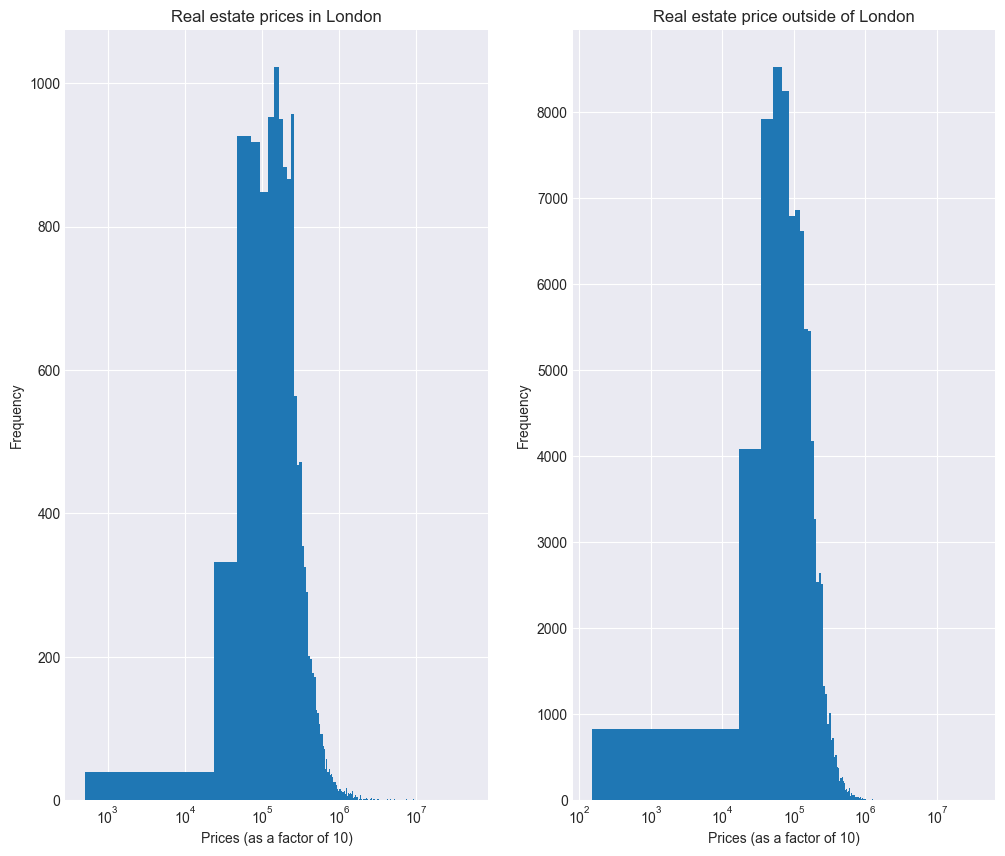

In [332]:
# Plots (histograms) for real estate prices in and outside of London
# The scale of the x-axis had to be modified, since the values were to big for a linear scale
rep_label = real_estate_prices.iloc[:,13]
cond = rep_label.str.contains('LONDON')
# Prices in London area
rep_London = real_estate_prices[cond]
rep_L_values = rep_London.iloc[:,1]

mask = [not c for c in cond]
# Prices outside of London area
rep_outside_London = real_estate_prices[mask]
rep_oL_values = rep_outside_London.iloc[:,1]

fig, axes = plt.subplots(1,2,figsize=(12,10))
idxm = rep_London.iloc[:,1].idxmax()
rep_London_max = rep_L_values.loc[rep_L_values.idxmax()]
axes[0].hist(rep_L_values, bins=2056)
axes[0].set_title("Real estate prices in London")
axes[0].set_xscale("log")
axes[0].set_xlabel('Prices (as a factor of 10)')
axes[0].set_ylabel('Frequency')

axes[1].hist(rep_oL_values, bins=2056)
axes[1].set_title("Real estate price outside of London")
axes[1].set_xscale('symlog')
axes[1].set_xlabel('Prices (as a factor of 10)')
axes[1].set_ylabel('Frequency')

#### Part 2

**(a)**
**Data types**

* Nominal data: Port of embarkation (Embarked)
* Ordinal data: Passenger class (PClass)
* Discrete data: Parents/children aboard (Parch)
* Continous data: Fare

Text(0.5, 1.0, 'Fares')

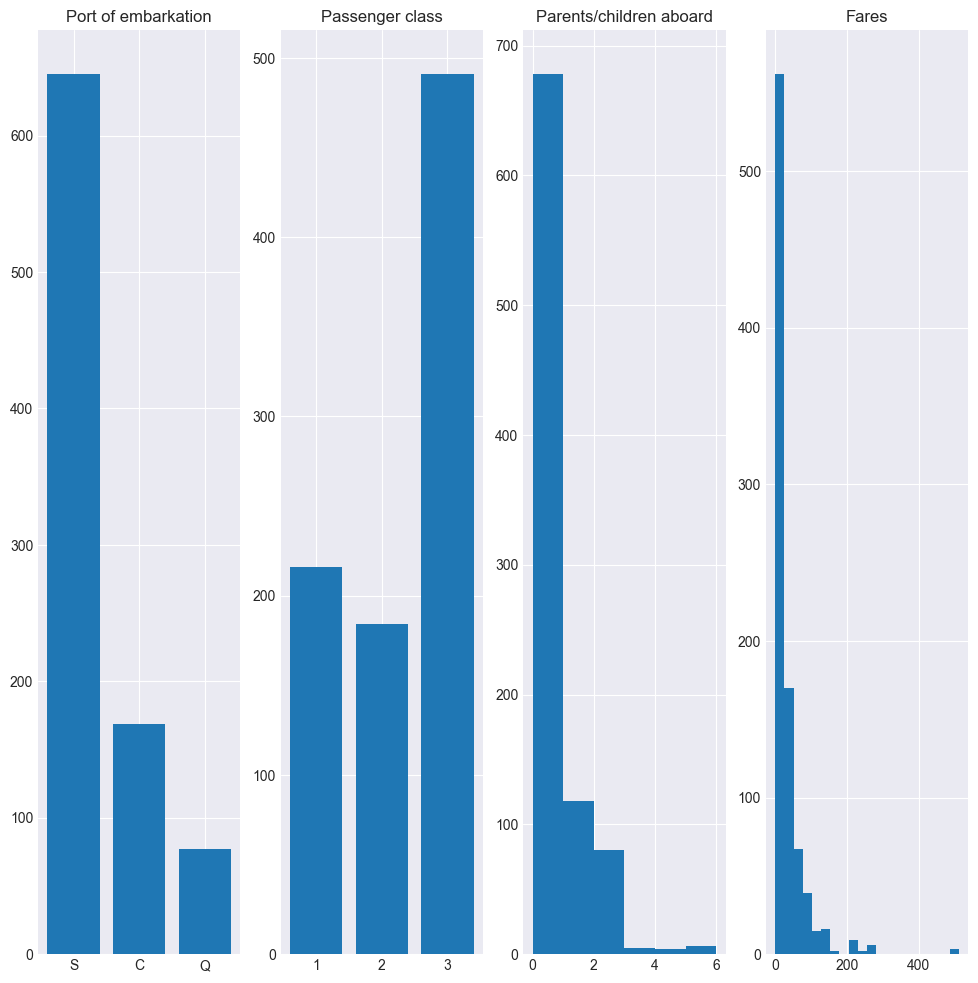

In [333]:
# Part 2
titanic_df = pd.read_csv('./titanic_train.csv')

embarked_freq = Counter(titanic_df['Embarked'].values)
p_class = Counter(titanic_df['Pclass'].values)
fare = titanic_df['Fare']

# Distributions of the four data type specified above
fig, axes = plt.subplots(1,4, figsize=(12,12))
axes[0].bar(embarked_freq.keys(), embarked_freq.values())
axes[0].set_title('Port of embarkation')

axes[1].bar(p_class.keys(), p_class.values())
axes[1].set_title('Passenger class')

axes[2].hist(titanic_df['Parch'], bins=6)
axes[2].set_title('Parents/children aboard')

axes[3].hist(fare, bins=20)
axes[3].set_title('Fares')

**(b) Histograms**

In [334]:
parch = Counter(titanic_df['Parch'].values)
parch_hist, parch_bins = np.histogram(titanic_df['Parch'], bins=6)
# Showing equivalens of computed histogram values and np.histogram-values
print('---- Parch ----')
print(f'Computed frequencey values: {parch.values()}\nNumpy generated frequency values: {parch_hist}')
print(f'Computed bins (6): {parch.keys()}\nNumpy generated bins (6): {parch_bins}\n')

fare_c = Counter(titanic_df['Fare'].values)
fare = titanic_df['Fare']

def create_bins(min, max, n_bins):
    bins = []
    step = max/n_bins
    while min < max:
        bins.append((round(min, 5), round(min+step, 5)))
        min = min+step
    return bins

def count_bins(data, bins):
    res = {}
    for bin in bins:
        counter = 0
        res.update({bin:0}) # setting the initial value to 0
        for i in range(len(data)):
            if data[i] >= bin[0] and data[i] <= bin[1]:
                counter += 1
                res.update({bin: counter})
    return res


fare_hist, fare_bins = np.histogram(titanic_df['Fare'], bins=20) 
fare_max = fare.loc[fare.idxmax()]
#print(create_bins(0, fare_max, 20))
n_bins = create_bins(0, fare_max, 20)
result = count_bins(fare, n_bins)
# Sorry for ugly printing
print('---- Fare ----')
print('Computed frequency values:')
pprint(result.values())
print('Numpy generated frequency values: {fare_hist}')
print(f'Computed bins (20): {n_bins}\nNumpy generated bins (20): {fare_bins}')


---- Parch ----
Computed frequencey values: dict_values([678, 118, 80, 5, 5, 4, 1])
Numpy generated frequency values: [678 118  80   5   4   6]
Computed bins (6): dict_keys([0, 1, 2, 5, 3, 4, 6])
Numpy generated bins (6): [0. 1. 2. 3. 4. 5. 6.]

---- Fare ----
Computed frequency values:
dict_values([562, 170, 67, 39, 15, 16, 2, 0, 9, 2, 6, 0, 0, 0, 0, 0, 0, 0, 0, 3])
Numpy generated frequency values: {fare_hist}
Computed bins (20): [(0, 25.61646), (25.61646, 51.23292), (51.23292, 76.84938), (76.84938, 102.46584), (102.46584, 128.0823), (128.0823, 153.69876), (153.69876, 179.31522), (179.31522, 204.93168), (204.93168, 230.54814), (230.54814, 256.1646), (256.1646, 281.78106), (281.78106, 307.39752), (307.39752, 333.01398), (333.01398, 358.63044), (358.63044, 384.2469), (384.2469, 409.86336), (409.86336, 435.47982), (435.47982, 461.09628), (461.09628, 486.71274), (486.71274, 512.3292)]
Numpy generated bins (20): [  0.       25.61646  51.23292  76.84938 102.46584 128.0823  153.69876
 179.3

**(c) Data quantile**

In [335]:
def compute_quantile(data, q):
    data.sort()
    stop = int(data.size*q)
    q_val = 0
    for i in range(stop):
            q_val = data[i]
    return q_val 

np_q2 = np.quantile(fare, .2)
np_q5 = np.quantile(fare, .5)

q2 = compute_quantile(fare.values, .2)
q5 = compute_quantile(fare.values, .5)

assert np_q2 == q2
assert np_q5 == q5
print(f'Computed .2 quantile: {q2}, Numpy generated .2 quantile: {np_q2}')
print(f'Computed .5 quantile: {q5}, Numpy generated .5 quantile: {np_q5}')

Computed .2 quantile: 7.8542, Numpy generated .2 quantile: 7.8542
Computed .5 quantile: 14.4542, Numpy generated .5 quantile: 14.4542


#### Part 3: Generating data from probabilistic models
**(a)**

Text(0.5, 1.0, 'Random numbers ranging from 0 to 1, from a gaussian distibution')

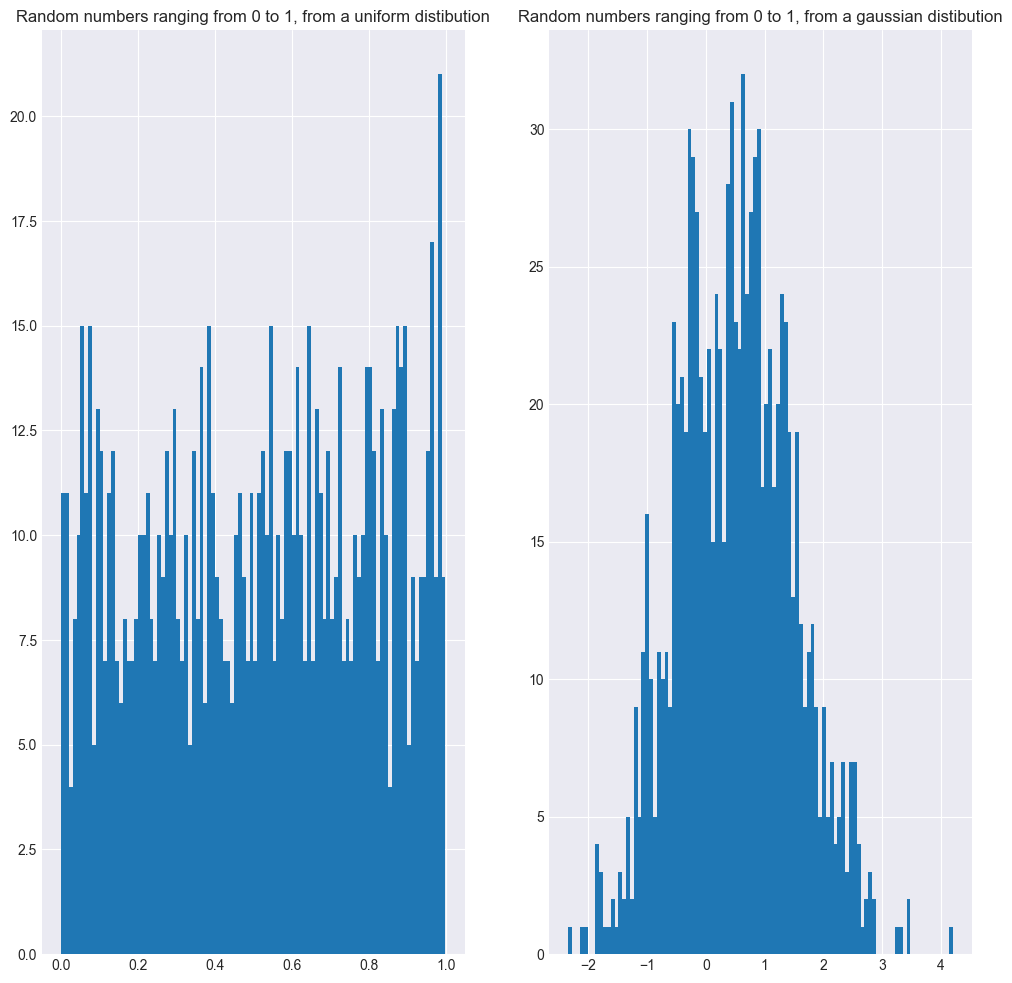

In [336]:
# Generating a set of random numbers
random_nums = np.random.rand(1000)
gauss_nums = np.random.normal(loc=0.5,size=1000)
fig, axes = plt.subplots(1,2, figsize=(12,12))

axes[0].hist(random_nums, bins=100)
axes[0].set_title('Random numbers ranging from 0 to 1, from a uniform distibution')

axes[1].hist(gauss_nums, bins=100)
axes[1].set_title('Random numbers ranging from 0 to 1, from a gaussian distibution')

The shape of the histogram from the uniform distribution doesn't take on any specific shape, and can have notably different shapes per execution. In essence, it doesn't follow any particular pattern, since it is random from a uniform distribution.

The histogram formed from the random numbers generated from a gaussian distribution does however have a distinct shape, namely a bell shape. Since the random numbers have a greater chance of being sampled from the middle, in this case 0.5, more numbers will appear closer to the middle and the possiblity of numbers appearing closer to the edges becomes increasing improbable the further you are from the middle, thus the bell shape is formed.

**(b) Modeling a student at an exam**

49


Text(0.5, 0, 'Number of correct answers (20 total)')

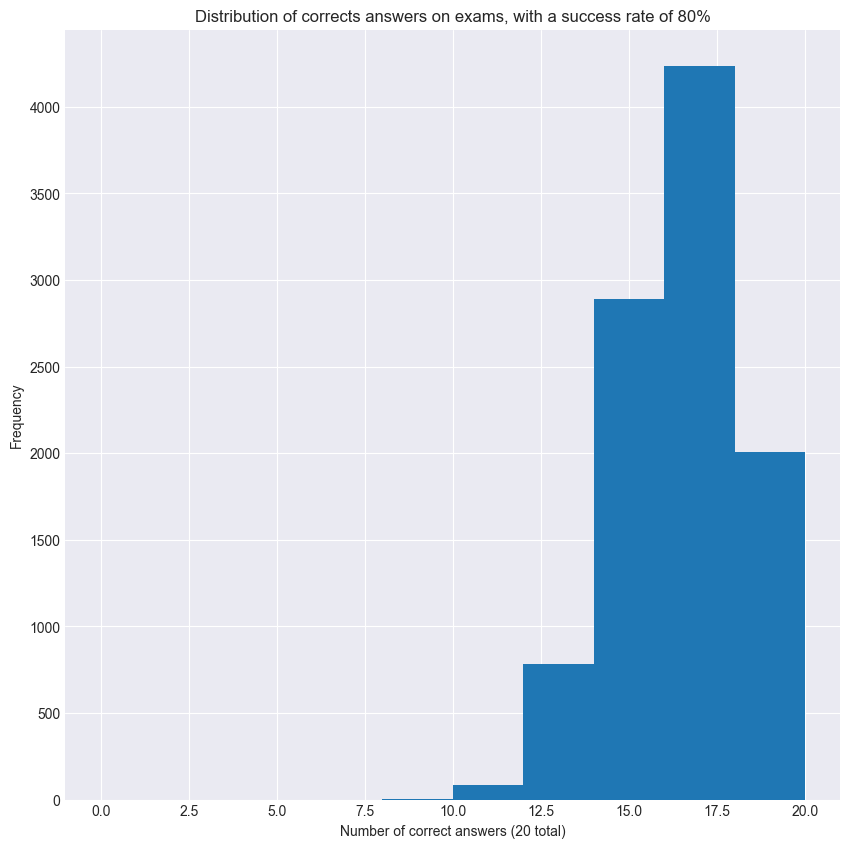

In [337]:
def success(p_succes):
    rand = np.random.uniform()
    if rand <= p_succes:
        return True
    else:
        return False

def exam_score(p_correct, n_instances):
    scope = []
    for _ in range(n_instances):
        scope.append(success(p_correct))
    successes = len([i for i in scope if i])
    #success_rate = successes/n_instances
    # the simulated amount of correct answers
    return successes 

print(exam_score(0.5, 100))

def simulate_exam_scores(n, p_correct, n_instances):
    array = np.empty(n)
    for i in range(n):
        array.put(i, exam_score(p_correct, n_instances))
    return array

sim_ex_scores = simulate_exam_scores(10000, 0.8, 20)
fig, ax = plt.subplots(1,1, figsize=(10,10))
bins = np.arange(0, 22, 2)
ax.hist(sim_ex_scores, bins=bins)
ax.set_title('Distribution of corrects answers on exams, with a success rate of 80%')
ax.set_ylabel('Frequency')
ax.set_xlabel('Number of correct answers (20 total)')

The number of correct answers follows a binomial distribution, as is when a bernoulli process is repeated. Each individual question in the respective tests can be viewed as a bernoulli trial, since it a yes-no question, i.e. a binary outcome. The shape of the distribution is dictated by the parameter *p*, which in our case corresponds to the probability of answering a question correctly. In this instance of the distribution, the shape is heavily skewed to the right, due to the high value of *p = 0.8*.

**(c) The persistent student**

Text(0.5, 0, 'Number of attempts')

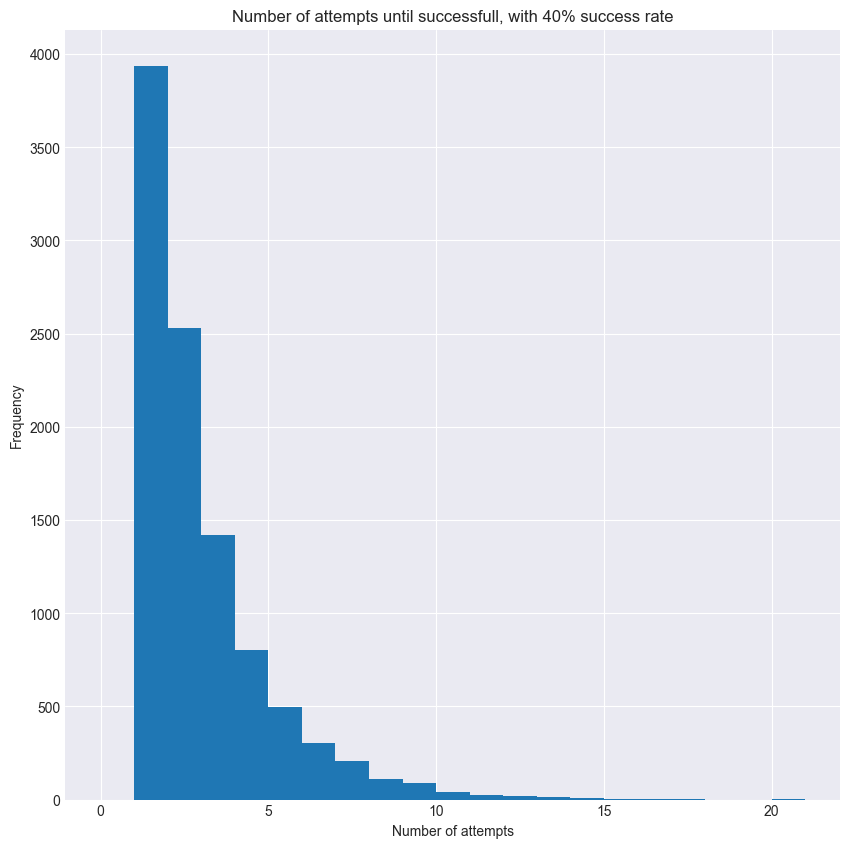

In [338]:
def number_of_attempts(p_pass):
    attempt = False
    count = 0
    while not attempt:
        attempt = success(p_pass)
        count += 1
    return count

sim_a = [number_of_attempts(0.4) for _ in range(10000)]
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.hist(sim_a, bins=np.arange(0,22,1))
ax.set_title('Number of attempts until successfull, with 40% success rate')
ax.set_ylabel('Frequency')
ax.set_xlabel('Number of attempts')

The result of the simulation in (c) follows that of a geometric distribution. This is due to the high frequency of low values, in our case attempts, and the steep decrease in frequency as x on the x-axis grows. More specifically, the probability distribution of the number of failures before the first sucess. It could be thought of as the opposite of the previous distribution.